# Linear Regression Analysis of final project

## 0. Packages and Loading data

In [8]:
# Handle table-like data and matrices calculation
import numpy as np
import scipy as sp
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling Algorithms
# I will look at only four classification algorithms: LogisticRegression, GaussianNB, SVM, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingRegressor


# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, StandardScaler
# from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [9]:
## Some useful functions

def print_columns(df):
    print "There are",df.shape[1],'columns'
    print "They are:"
    for i in df.columns.values:
        print i
        
def list_null(df):
    print df.shape[1],' columns:'
    for i in df.columns.values:
        print i,': number of nan: ',df[i].isnull().sum(),', ',df[i].dtypes

In [10]:
## This is our original dataset

origin1=pd.read_csv('data1.csv',sep=',',index_col=0)

In [11]:
origin1.head()

,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",child,healthExp,publicEdu,ave_visitor,income,homicide,ecoFree,uniEnro,alcohol,unemploy,food,suicide,visitor
0,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,99.5,58.0,3.1,0.000000,512,6.6,1.0,4.0,0.01,8.5,2100.0,5.7,0
1,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,15.5,240.0,3.5,115.182482,4245,5.5,65.1,58.6,5.14,13.9,3023.0,5.9,3156000
2,5.604596,9.487703,0.447821,0.839397,64.001305,-0.198894,0.388313,26.1,335.0,4.3,1.105914,4532,1.3,51.0,32.2,0.66,11.0,3272.0,1.9,2634000
3,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,172.2,168.0,3.4,0.423518,3505,9.8,46.7,6.9,8.24,6.9,2384.0,13.8,528000
4,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,13.8,727.0,5.1,2.041517,10391,6.6,48.0,79.0,8.35,7.2,3155.0,10.3,5587000


In [12]:
print_columns(origin1)

There are 20 columns
They are:
Happiness
Log GDP per capita
Confidence in national government
Social support
Healthy life expectancy at birth
Generosity
GINI index (World Bank estimate), average 2000-13
child
healthExp
publicEdu
ave_visitor
income
homicide
ecoFree
uniEnro
alcohol
unemploy
food
suicide
visitor


Now let's rename the name of columns in order to make it easy to use in our model calculation 

In [13]:
reorigin=origin1.rename(columns={'Log GDP per capita':'gdp','GINI index (World Bank estimate), average 2000-13':'gini','Confidence in national government':'confidence',
                                'Social support':'social_support','Healthy life expectancy at birth':'life_expectancy'})

In [14]:
print_columns(reorigin)

There are 20 columns
They are:
Happiness
gdp
confidence
social_support
life_expectancy
Generosity
gini
child
healthExp
publicEdu
ave_visitor
income
homicide
ecoFree
uniEnro
alcohol
unemploy
food
suicide
visitor


## 1. Train and test data

In [49]:
## This line, we used it to seperate independent and dependent varaibles

X_df=reorigin.loc[:, reorigin.columns != 'Happiness']
Y_df=reorigin['Happiness']

For convenience, I also prepare data as numpy array

In [50]:
array=reorigin.values

X_array=array[:,1:]
Y_array=array[:,0]

Different formats of train and test dataset

In [51]:
X_traindf,X_testdf,Y_traindf,Y_testdf=train_test_split(X_df,Y_df,test_size=0.33,random_state=7)

In [52]:
X_train_arr,X_test_arr,Y_train_arr,Y_test_arr=train_test_split(X_array,Y_array,test_size=0.33,random_state=7)

## 2. Training model and Feature selection by Statesmodels

### 2.1 Training model with full dataset

In [53]:
## I will use statsmodles, which gives us a comprehensible details

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [54]:
fit1=sm.OLS(Y_traindf,X_traindf).fit()

In [55]:
print fit1.rsquared_adj
print fit1.summary()

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     396.9
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           1.57e-66
Time:                        12:37:55   Log-Likelihood:                -75.398
No. Observations:                  93   AIC:                             188.8
Df Residuals:                      74   BIC:                             236.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
gdp                 0.2302      0.120     

** Comments of our model:**

1. **$R^2$**:
For our model calculation, we have a surprsingly good $R^2$ and $Adj.R^2$ values. This indicates that our model has a very good fit. This is only show that indeed, there are strong linear relation between ***Happiness***  and other variables. But it doesn't say anything about the feature importance.

2. ***F-statstics***:


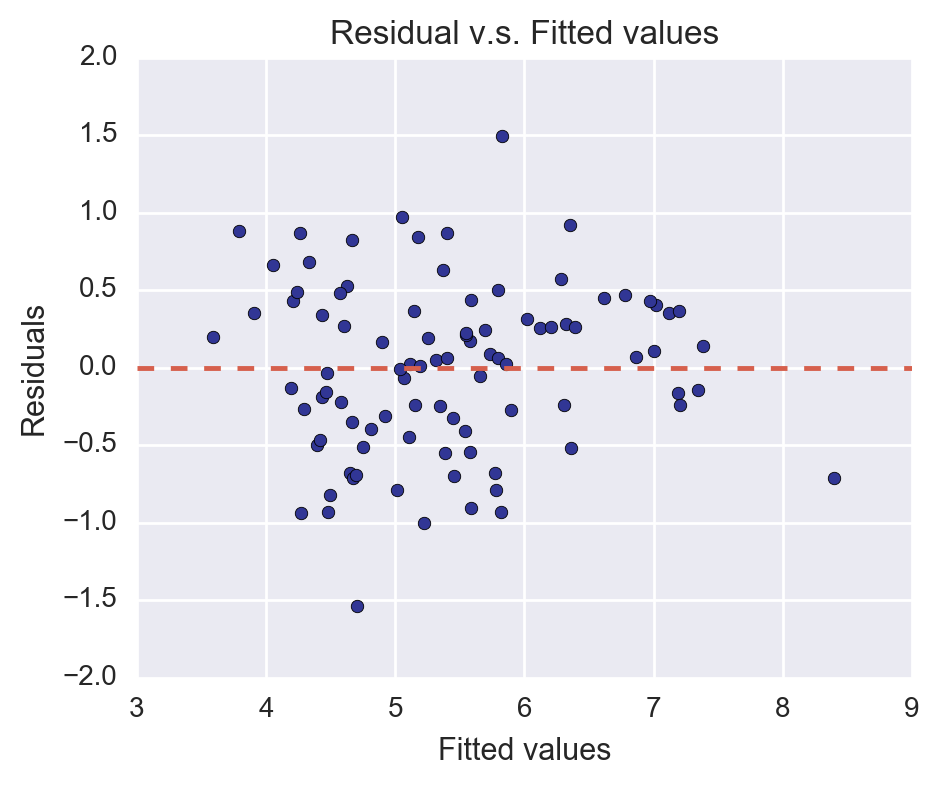

In [26]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.scatter(fit1.fittedvalues,fit1.resid,s=20,c='#313695')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual v.s. Fitted values')

ax.axhline(y=0,ls='--',c='#d6604d')

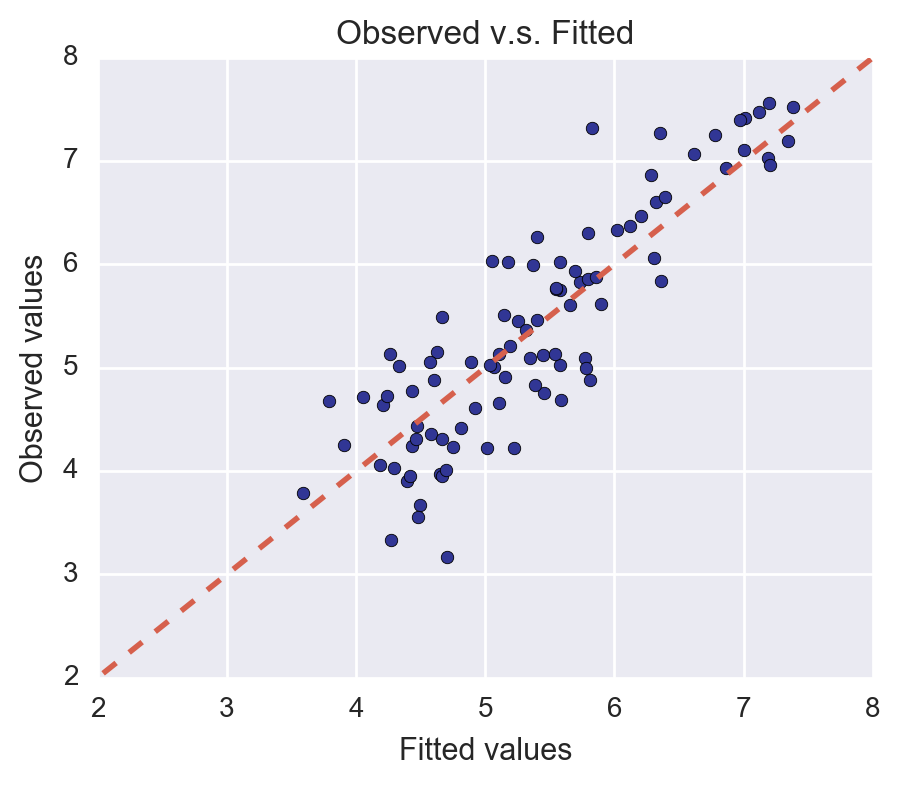

In [35]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.scatter(fit1.fittedvalues,Y_traindf,s=20,c='#313695')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Observed values')
ax.set_title('Observed v.s. Fitted')
ax.set_xlim(2,8)
ax.set_ylim(2,8)

ax.plot([0,8],[0,8],ls='--',lw=2,c='#d6604d')

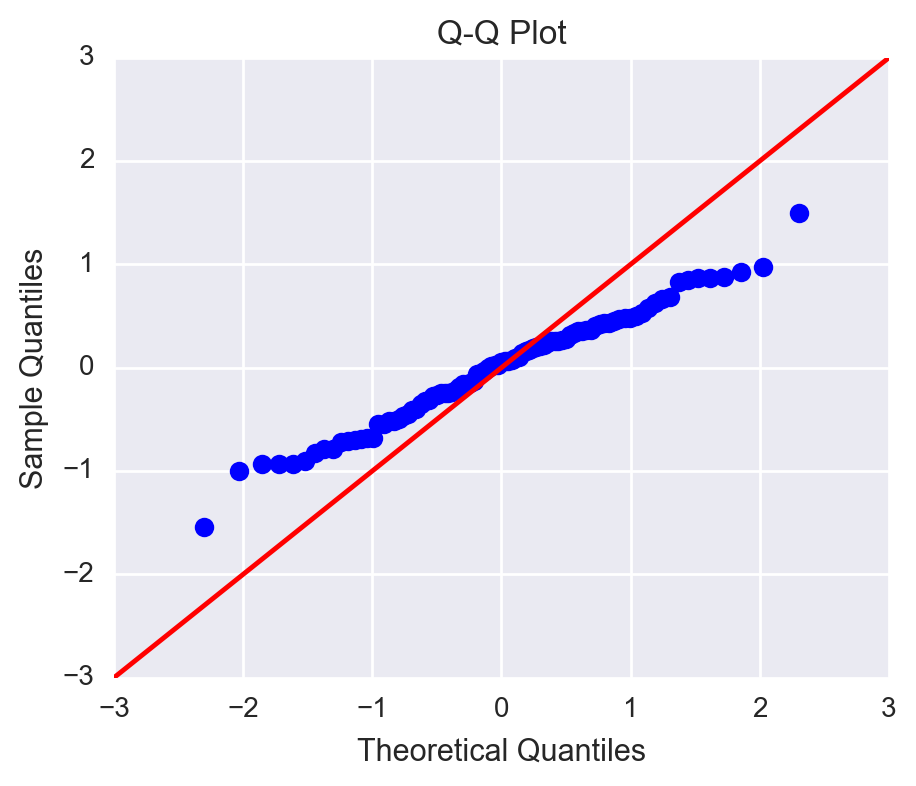

In [47]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
probplot = sm.ProbPlot(fit1.resid)
probplot.qqplot(line='45', ax=ax)

ax.set_title('Q-Q Plot')



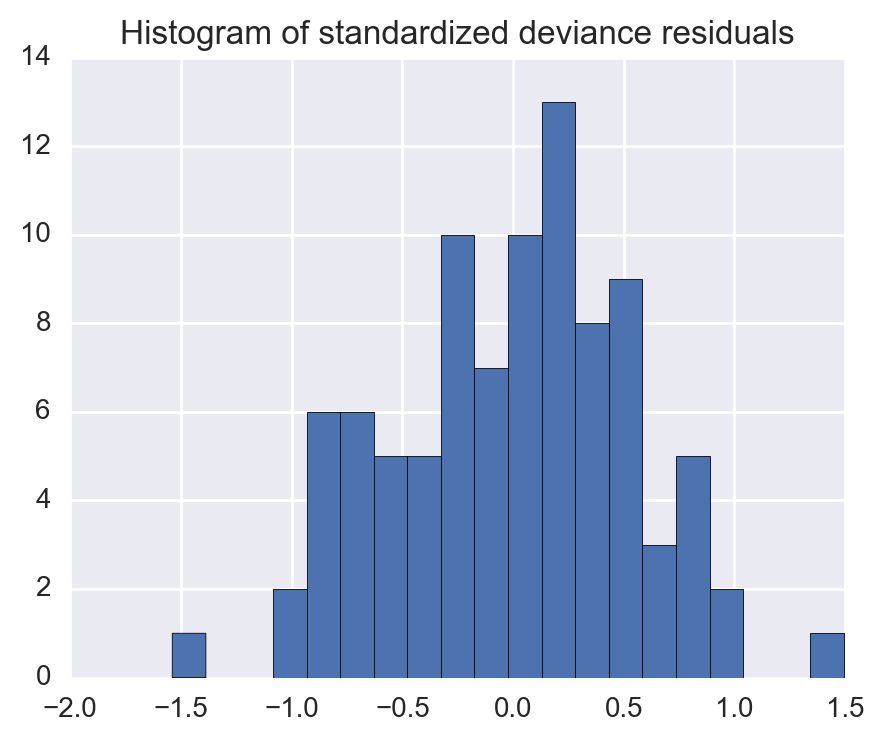

In [45]:
from scipy import stats

fig, ax = plt.subplots(1,1,figsize=(5,4))

ax.hist(fit1.resid, bins=20)
ax.set_title('Histogram of standardized deviance residuals');

**Conclusion 2.1**

### 2.2 Feature selections

Let's start from a null model and make a foward model selection

In [57]:
## null model:

beta0=Y_traindf.mean()
max_r2=0.0
print beta0

5.40526390589


In [79]:
## This loop is the forward feature selection method:

num_features=len(X_traindf.columns.values)
features=X_traindf.columns.values

features=[i for i in range(num_features)]
flist=[0]
results=[]

for i in range(num_features):
    ## the second loop is over the 1,2,3,...points, so that it will compare the extra feature:
    max_r2=0.0
    for j in range(num_features-i):
        flist[-1]=features[j]
        
        ## fit the model:
        fit_model=sm.OLS(Y_traindf,X_traindf.ix[:,flist]).fit()
        r2=fit_model.rsquared_adj
        
        ## pick up the best feature index by using adjust r^2
        if r2>=max_r2:
            max_r2=r2
            max_index=features[j]
    
    flist[-1]=max_index
    if len(flist)<num_features:
        flist.append(0)
    features.remove(max_index)


In [82]:
models=[]

for i in range(num_features):
    instr=str(i)+' features'
    ele=(instr,sm.OLS(Y_traindf,X_traindf.ix[:,flist[0:i+1]]).fit().rsquared_adj)
    models.append(ele)

In [83]:
## Since I am using the statemodels, so I have to write my own cross_validation function

from random import seed
from random import randrange

## This function split the dataset into nfold
def cross_validation_split(dataset,n_folds):
    dataset_split=list()
    dataset_copy=list(dataset)
    fold_size=int(len(dataset)/n_folds)
    for i in range(n_folds):
        fold=list()
        while len(fold)<fold_size:
            index=randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

## This function evaluates the algorithm using a cross validation split


[('0 features', 0.97927461913672231),
 ('1 features', 0.98274091115931983),
 ('2 features', 0.98556379254286952),
 ('3 features', 0.98668979921399658),
 ('4 features', 0.98720623033462018),
 ('5 features', 0.98763628616609012),
 ('6 features', 0.9878896090087731),
 ('7 features', 0.98832009949046506),
 ('8 features', 0.98850834615228089),
 ('9 features', 0.98862610127068506),
 ('10 features', 0.98861382080911453),
 ('11 features', 0.98857621211081714),
 ('12 features', 0.98853603382764299),
 ('13 features', 0.98845663527217376),
 ('14 features', 0.98834197603810392),
 ('15 features', 0.98824004540435839),
 ('16 features', 0.9881068411648507),
 ('17 features', 0.98795103949288554),
 ('18 features', 0.98778830339025836)]

In [85]:
a=np.array([[1,2],[3,4],[5,6]])
list(a)

[array([1, 2]), array([3, 4]), array([5, 6])]

In [65]:
a.remove(3)

In [66]:
a

[1, 2, 4, 5, 6]

In [86]:
reorigin.head()

,Happiness,gdp,confidence,social_support,life_expectancy,Generosity,gini,child,healthExp,publicEdu,ave_visitor,income,homicide,ecoFree,uniEnro,alcohol,unemploy,food,suicide,visitor
0,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,99.5,58.0,3.1,0.000000,512,6.6,1.0,4.0,0.01,8.5,2100.0,5.7,0
1,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,15.5,240.0,3.5,115.182482,4245,5.5,65.1,58.6,5.14,13.9,3023.0,5.9,3156000
2,5.604596,9.487703,0.447821,0.839397,64.001305,-0.198894,0.388313,26.1,335.0,4.3,1.105914,4532,1.3,51.0,32.2,0.66,11.0,3272.0,1.9,2634000
3,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,172.2,168.0,3.4,0.423518,3505,9.8,46.7,6.9,8.24,6.9,2384.0,13.8,528000
4,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,13.8,727.0,5.1,2.041517,10391,6.6,48.0,79.0,8.35,7.2,3155.0,10.3,5587000


In [89]:
copy=list(X_array)

In [91]:
len(copy)

139

In [92]:
from random import seed
from random import randrange

In [93]:
index=randrange(len(copy))

In [95]:
index

28

In [97]:
copy.pop(0)

array([  7.54924059e+00,   4.35440153e-01,   5.20636737e-01,
         4.87383461e+01,   2.47900203e-01,   3.00000000e-01,
         9.95000000e+01,   5.80000000e+01,   3.10000000e+00,
         0.00000000e+00,   5.12000000e+02,   6.60000000e+00,
         1.00000000e+00,   4.00000000e+00,   1.00000000e-02,
         8.50000000e+00,   2.10000000e+03,   5.70000000e+00,
         0.00000000e+00])

In [98]:
a=[1,2,3,4]

In [99]:
b=sum(a,[])

TypeError: can only concatenate list (not "int") to list

In [104]:
a1=np.array([1,2,3])
a2=np.array([4,5,6])
a3=np.array([7,8,9])

b1=np.array([11,12,13])
b2=np.array([14,15,16])
b3=np.array([17,18,19])


b=sum([[a1,a2,a3],[b1,b2,b3]],[])

In [105]:
b

[array([1, 2, 3]),
 array([4, 5, 6]),
 array([7, 8, 9]),
 array([11, 12, 13]),
 array([14, 15, 16]),
 array([17, 18, 19])]

In [106]:
c=[[1,2,3],[4,5,6]]
d=sum(c,[])

In [110]:
np.array(b)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13],
       [14, 15, 16],
       [17, 18, 19]])

In [17]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
predict=model.predict(X_test)
residual=model.residues_

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
